## <font color="blue">ITOM 6267 Data Mining Project 1</font>

**Group 22: Saiko Chen, Jessie Lam, Ramsey Makhzoumi, Yining Wu**

### <font color="blue">Project Objective: 
    Build a Model to predict U.S. household with income >50K using the 1994 Census data. Identify target customer group for a multinational banking enterprise's marketing campaign.</font>

<font color='blue'> **Q1:** How many observations (rows) and how many variables (columns) are there in the raw data?</font>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data and add headers for columns
adult = pd.read_csv('C:/Users/Wyn/Documents/data/adult.csv',  index_col=False, #na_values = ' ?',
                   names = ["age", "workclass", "fnlwgt", "education", "education_num", 
         "marital-status", "occupation", "relationship", "race", "sex", 
         "capital-gain", "capital-loss", "hours-per-week", "native-country","income"])
adult.shape

(32561, 15)

In [4]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Rescaling the dataset using fnlwgt varaible
adult['fnlwgt'] = adult['fnlwgt'].apply(lambda x: round(x*0.001))

In [6]:
#Checking to see if it was succesful
adult.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,78,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,216,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,235,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Duplicate respective observations by their respective fnlwgt value/multiplier
adult = adult.loc[adult.index.repeat(adult.fnlwgt)].reset_index(drop=True)

In [8]:
adult.shape

(6179392, 15)

In [9]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,78,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,39,State-gov,78,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,39,State-gov,78,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
3,39,State-gov,78,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
4,39,State-gov,78,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


 <font color ="blue"> **Q2:** Produce a table of variables showing their types.

In [10]:
# check data types
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6179392 entries, 0 to 6179391
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   age             int64 
 1   workclass       object
 2   fnlwgt          int64 
 3   education       object
 4   education_num   int64 
 5   marital-status  object
 6   occupation      object
 7   relationship    object
 8   race            object
 9   sex             object
 10  capital-gain    int64 
 11  capital-loss    int64 
 12  hours-per-week  int64 
 13  native-country  object
 14  income          object
dtypes: int64(6), object(9)
memory usage: 707.2+ MB


<font color='blue'> **Q3:** Some of the variables appear to be numeric but should be treated as categorical. Your best clue is whether a variable has only a few discrete values. Which numeric variables should be treated as categorical? .</font>

In [11]:
# check unique counts for numeric variables
numeric = adult.select_dtypes(include=['int64'])
unique = numeric.agg(['nunique'])
unique.head()

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week
nunique,73,665,16,119,92,94


In [12]:
# group continuous variables together
continuous = []
for v in unique:
    if unique[v][0] > 20:
        continuous.append(v)
print(continuous)

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']


In [13]:
# convert 'education_num' into categorical variables
#adult["education_num"]=adult["education_num"].astype(str)
#adult.info()

<font color='blue'> **Q4:** For numeric variables, produce a table of statistics including missing values, min, max, median, mean, standard deviation, skewness and kurtosis.</font>

In [14]:
# remove 'fnlwgt' from continuous vars list
continuous.remove('fnlwgt')
# descriptive statistics on continuous variables
adult[continuous].agg(['min','max','median','mean','std','skew','kurtosis'])

,age,capital-gain,capital-loss,hours-per-week
min,17.000000,0.000000,0.000000,1.000000
max,90.000000,99999.000000,4356.000000,99.000000
median,36.000000,0.000000,0.000000,40.000000
mean,38.000012,1079.290889,85.006279,40.308485
std,13.467664,7432.345586,396.803787,12.096812
skew,0.594771,11.913348,4.643675,0.204044
kurtosis,-0.121268,153.333251,20.788929,2.982653


In [15]:
#Checking for missing values
adult[continuous].isnull().sum()

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [16]:
continuous_nu = adult[continuous].isnull().sum()
#print(adult_nu_nu)

# covert to datafram
continuous_nu2 = pd.DataFrame(continuous_nu,columns=['missing values'])
#print(adult_nu_nu2)

# transpose data
continuous_nu3 =continuous_nu2.transpose()
#print(continuous_nu3)

statistics = adult[continuous].agg(['min','max','median','mean','std','skew','kurtosis'])
statistics2 = pd.DataFrame(statistics)

# conc
frame = [continuous_nu3, statistics2]
table_of_statistics = pd.concat(frame)
print("Table of Statistics: \n", table_of_statistics)


Table of Statistics: 
                       age  capital-gain  capital-loss  hours-per-week
missing values   0.000000      0.000000      0.000000        0.000000
min             17.000000      0.000000      0.000000        1.000000
max             90.000000  99999.000000   4356.000000       99.000000
median          36.000000      0.000000      0.000000       40.000000
mean            38.000012   1079.290889     85.006279       40.308485
std             13.467664   7432.345586    396.803787       12.096812
skew             0.594771     11.913348      4.643675        0.204044
kurtosis        -0.121268    153.333251     20.788929        2.982653


<font color="blue"> **Q5:** How many outliers are present in each numeric variable? Show the tallies in a table. Set them to missing.</font>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

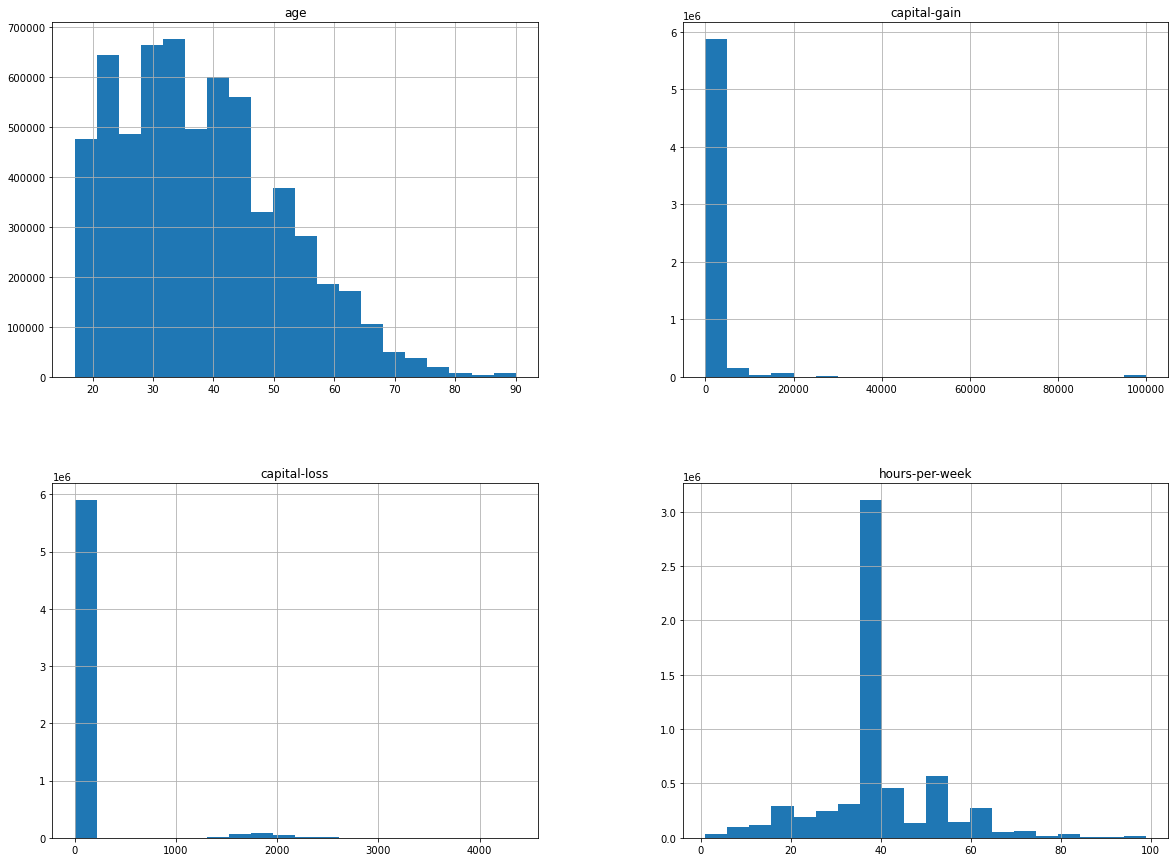

In [17]:
# check distribution of data using histograms
cont_subset = adult[continuous]
cont_subset.hist(bins=20, figsize=(20, 15))

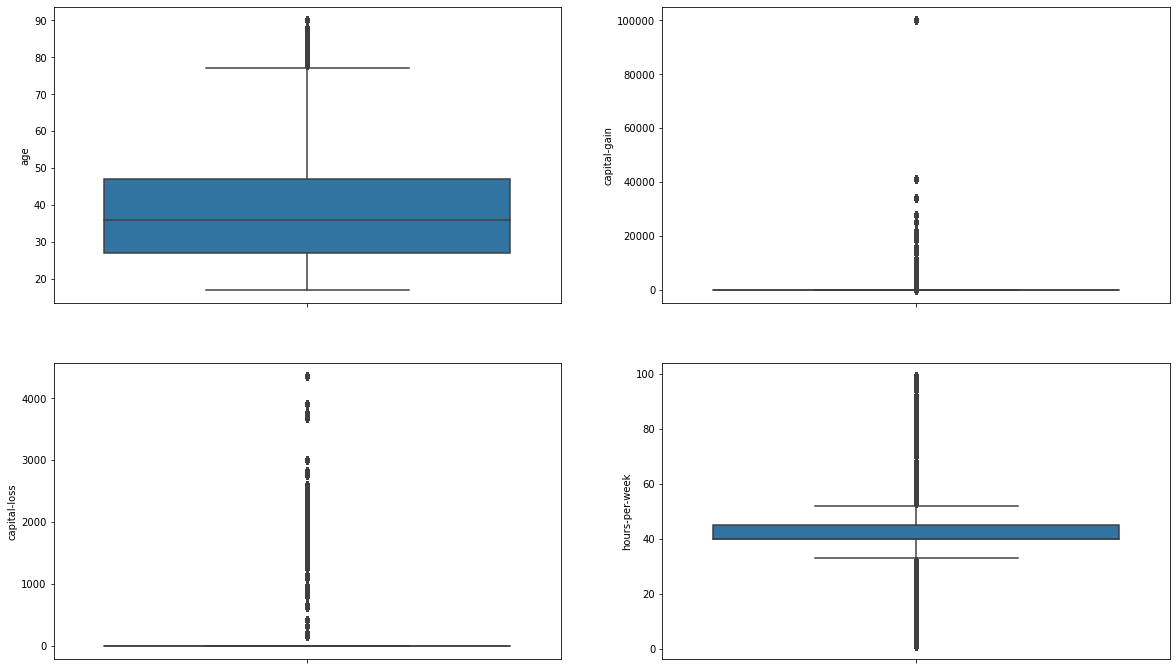

In [18]:
# show boxplots for continuous variables - before imputing - to show outliers
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'age', data = adult)
plt.subplot(2,2,2)
sns.boxplot(y = 'capital-gain', data = adult)
plt.subplot(2,2,3)
sns.boxplot(y = 'capital-loss', data = adult)
plt.subplot(2,2,4)
sns.boxplot(y = 'hours-per-week', data = adult)
plt.show()

In [19]:
#Understanding what values are outliers using the IQR analysis
for var in continuous:
    upper_quartile = np.nanpercentile(adult[var], 75)
    lower_quartile = np.nanpercentile(adult[var], 25)
    iqr = upper_quartile - lower_quartile
    
    upper_whisker = upper_quartile + 1.5 * iqr
    lower_whisker = np.maximum((lower_quartile - 1.5 * iqr), 0)

    outlier = ((adult[var] < lower_whisker) | (adult[var] > upper_whisker)).sum()
    percent = outlier/len(adult[var]) * 100
    print(f"{var} has {outlier} outliers, percentage: {percent:.2f}%")

age has 26732 outliers, percentage: 0.43%
capital-gain has 510065 outliers, percentage: 8.25%
capital-loss has 281762 outliers, percentage: 4.56%
hours-per-week has 1666477 outliers, percentage: 26.97%


In [20]:
# check for zero values in the capital-gain and capital-loss columns
for var in ['capital-gain', 'capital-loss']:
    zero = (adult[var]==0).sum()
    zero_percent = zero/len(adult[var]) * 100
    print(f"{var} has {zero} zeros, percentage: {zero_percent:.2f}%")
# since over 90% of the values in these two columns are zero, 
# it does not provide valuable information, we will ignore these in model building 

capital-gain has 5669327 zeros, percentage: 91.75%
capital-loss has 5897630 zeros, percentage: 95.44%


In [21]:
# replace outliers with upper and lower whisker
for var in continuous:
    upper_quartile = np.nanpercentile(adult[var], 75)
    lower_quartile = np.nanpercentile(adult[var], 25)
    iqr = upper_quartile - lower_quartile
    
    upper_whisker = upper_quartile + 1.5 * iqr
    lower_whisker = np.maximum((lower_quartile - 1.5 * iqr), 0)
    
    adult[var] = np.where(adult[var] < lower_whisker, lower_whisker, adult[var])               
    adult[var] = np.where(adult[var] > upper_whisker, upper_whisker, adult[var])

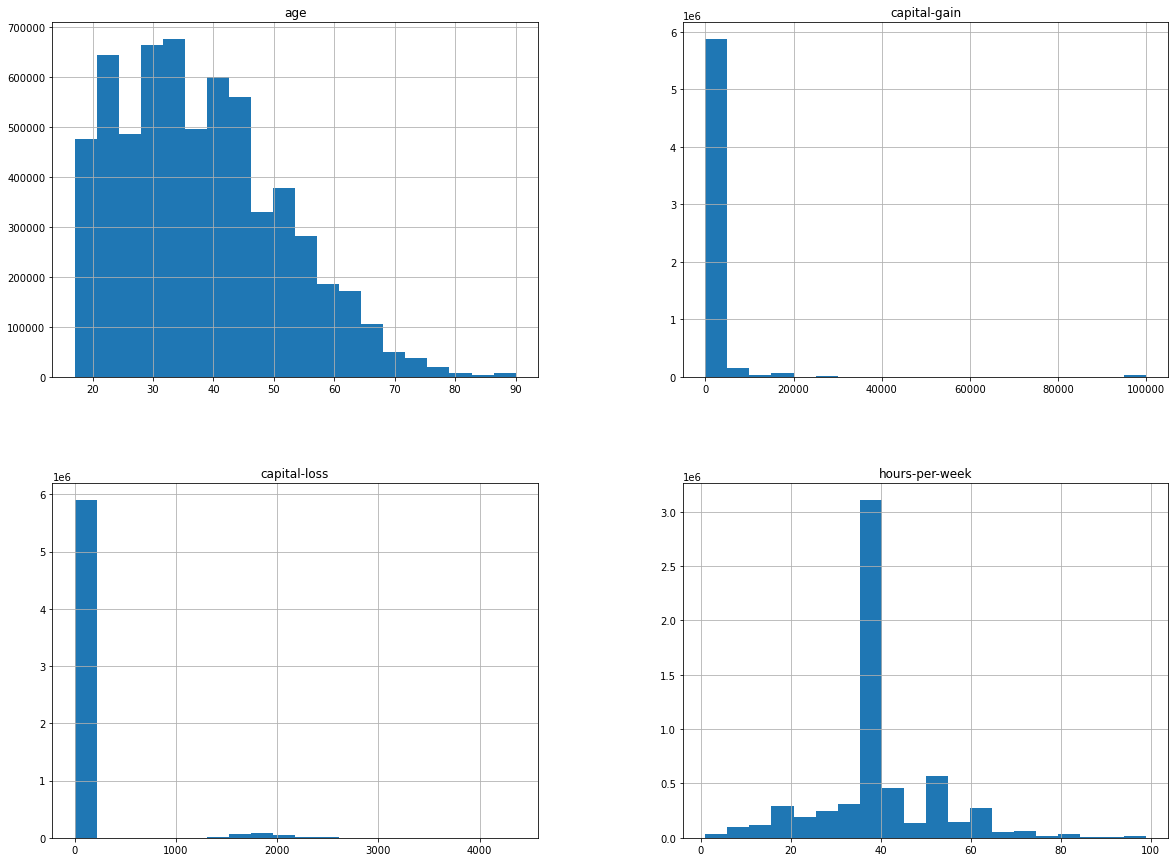

In [22]:
# show histogram for all numeric values - after imputing
cont_subset.hist(bins=20, figsize=(20, 15))
plt.show()

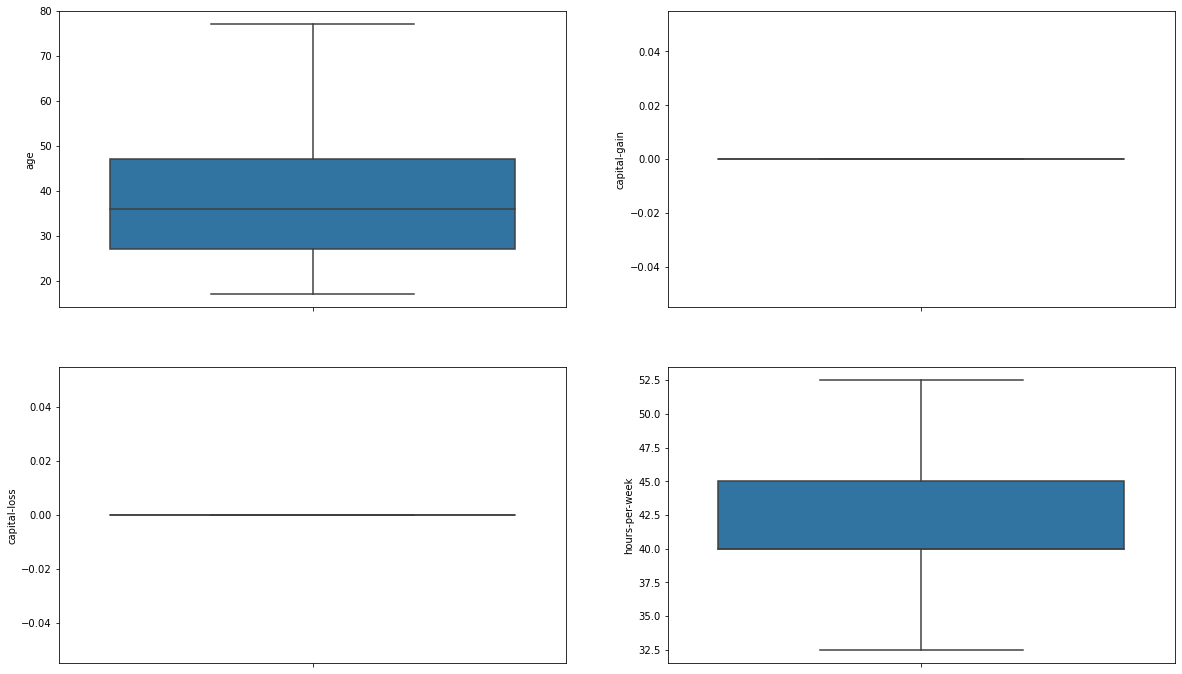

In [23]:
# show boxplots for continuous variables - after imputing
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'age', data = adult)
plt.subplot(2,2,2)
sns.boxplot(y = 'capital-gain', data = adult)
plt.subplot(2,2,3)
sns.boxplot(y = 'capital-loss', data = adult)
plt.subplot(2,2,4)
sns.boxplot(y = 'hours-per-week', data = adult)
plt.show()

In [24]:
#use the following code if replacing with mean
#for var in continuous: adult[var].fillna(value = adult[var].mean(skipna=True), inplace = True)

In [25]:
numericalv = [x for x in adult.columns if adult[x].dtype!='O']  # 'O'     (Python) objects
numericalv

['age',
 'fnlwgt',
 'education_num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [26]:
#No null values in Numerical variables!
adult[numericalv].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

<font color="blue"> **Q6:** Count the unique values of each categorical variable, including missing values. Are there any unusual values in any of the categorical variables?

In [27]:
categorical = adult.select_dtypes(include='object')
categorical.nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
dtype: int64

In [28]:
categoricalv = [x for x in adult.columns if adult[x].dtype=='O']
categoricalv

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [29]:
adult[categoricalv].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
2,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
3,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
4,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K


In [30]:
for x in categoricalv:
    print(adult[x].value_counts())

 Private             4374994
 Self-emp-not-inc     446196
 Local-gov            394820
 ?                    346138
 State-gov            239009
 Self-emp-inc         196394
 Federal-gov          177819
 Without-pay            2440
 Never-worked           1582
Name: workclass, dtype: int64
 HS-grad         1990366
 Some-college    1376181
 Bachelors       1007002
 Masters          309876
 Assoc-voc        251445
 11th             229045
 Assoc-acdm       206375
 10th             183643
 7th-8th          121491
 Prof-school      106932
 9th              104065
 12th              86218
 5th-6th           77411
 Doctorate         77106
 1st-4th           40204
 Preschool         12032
Name: education, dtype: int64
 Married-civ-spouse       2796929
 Never-married            2087314
 Divorced                  825535
 Separated                 211614
 Widowed                   172936
 Married-spouse-absent      80737
 Married-AF-spouse           4327
Name: marital-status, dtype: int64
 Craft

<font color="blue">**Q7:** Impute the missing values. Be sure to explain how you did that in your presentation.</font>

In [31]:
# check the percentage of "?" missing values
for x in ['workclass', 'occupation','native-country']:
    q = (adult[x]==' ?').sum()
    q_percent = q/len(adult[x]) * 100
    print(f"{x} has {q} ?, percentage: {q_percent:.2f}%")

workclass has 346138 ?, percentage: 5.60%
occupation has 347720 ?, percentage: 5.63%
native-country has 112699 ?, percentage: 1.82%


In [32]:
# replace ' ?' with 'Unknown'
adult = adult.replace(' ?','Unknown')
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [33]:
adult.workclass.value_counts()

 Private             4374994
 Self-emp-not-inc     446196
 Local-gov            394820
Unknown               346138
 State-gov            239009
 Self-emp-inc         196394
 Federal-gov          177819
 Without-pay            2440
 Never-worked           1582
Name: workclass, dtype: int64

In [34]:
#Checking for high or low Cardinality
for x in categoricalv:
    print(x, len(adult[x].unique()), 'labels')

workclass 9 labels
education 16 labels
marital-status 7 labels
occupation 15 labels
relationship 6 labels
race 5 labels
sex 2 labels
native-country 42 labels
income 2 labels


<font color="blue">**Q8:** Produce a histogram or boxplot for each of the numeric variables.</font>

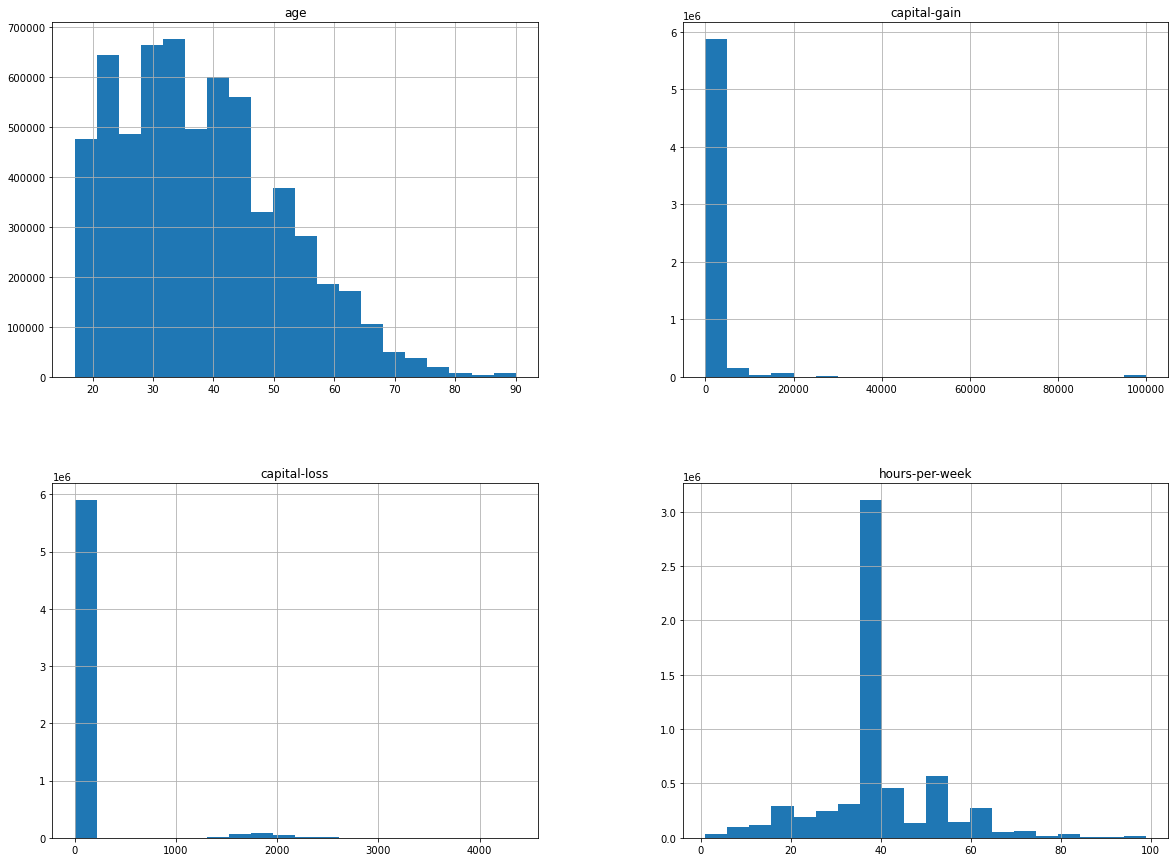

In [35]:
# histogram of numeric vars after replacing outliers with boundaries
cont_subset.hist(bins=20, figsize=(20, 15))
plt.show()

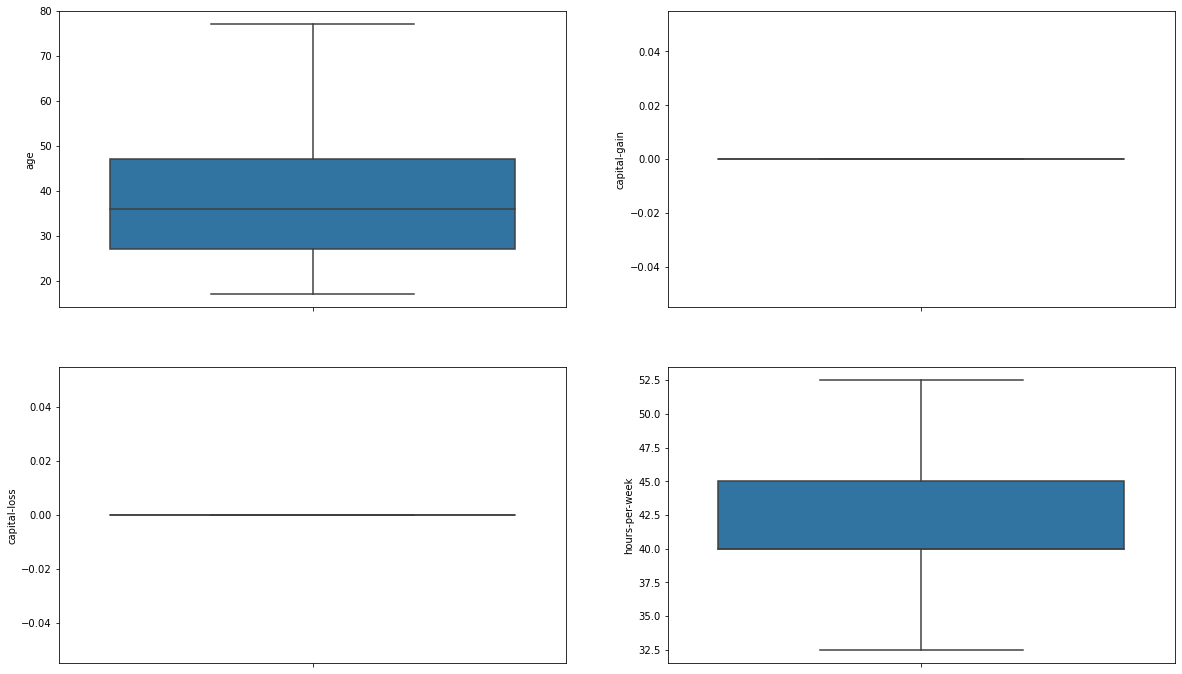

In [36]:
# boxplots for continuous vars after treating outliers
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y = 'age', data = adult)
plt.subplot(2,2,2)
sns.boxplot(y = 'capital-gain', data = adult)
plt.subplot(2,2,3)
sns.boxplot(y = 'capital-loss', data = adult)
plt.subplot(2,2,4)
sns.boxplot(y = 'hours-per-week', data = adult)
plt.show()

<font color = "blue"> **Q9:** Produce a bar chart for each of the categorical variables showing the counts for each unique value.</font>

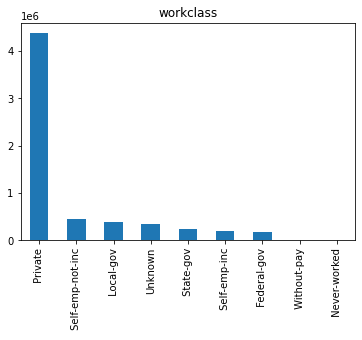

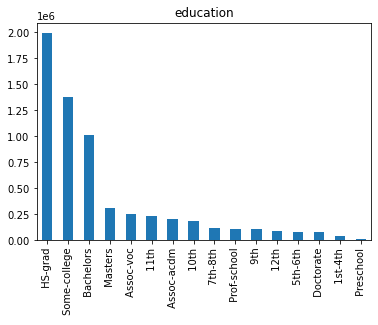

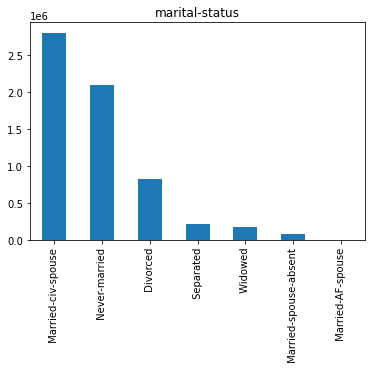

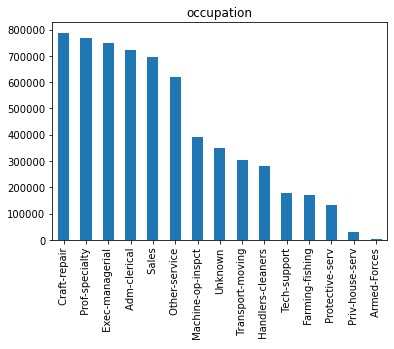

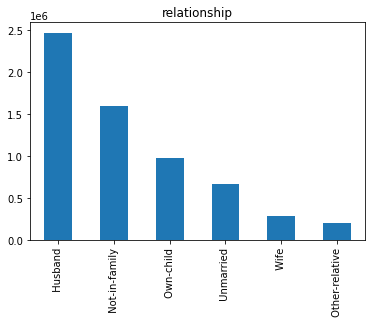

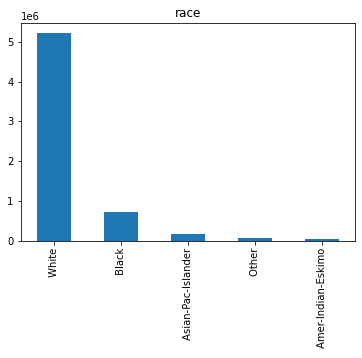

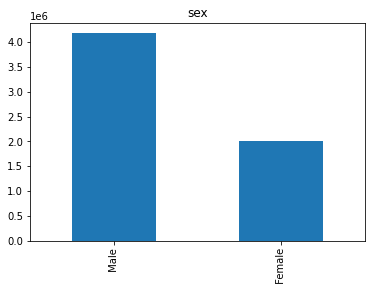

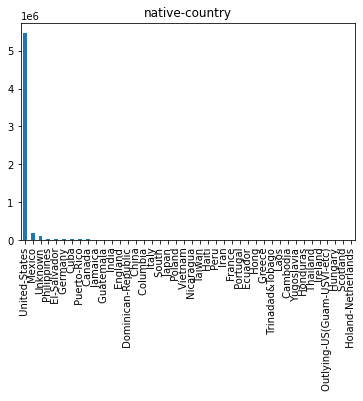

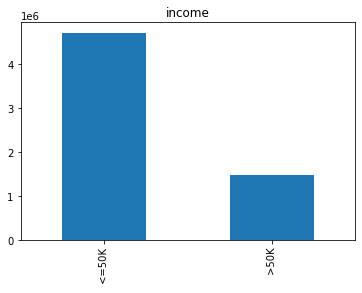

In [37]:
for v in categoricalv:
    adult[v].value_counts().plot(kind='bar')
    plt.title(v)
    plt.show()

In [38]:
# 'native-country' column has too many labels, so we first check the percentage of "United-States"
US = (adult['native-country']==' United-States').sum()
US_percent = US/len(adult['native-country']) * 100
print(f"{US_percent:.2f}% of the census surveyed are from the United States.")

88.31% of the census surveyed are from the United States.


In [39]:
# Convert "native-country" values to "US" and "Non-US"
adult['native-country'] = np.where((adult['native-country'] == ' United-States'),'US','Non-US')
adult['native-country'].value_counts()

US        5456811
Non-US     722581
Name: native-country, dtype: int64

<AxesSubplot:xlabel='income'>

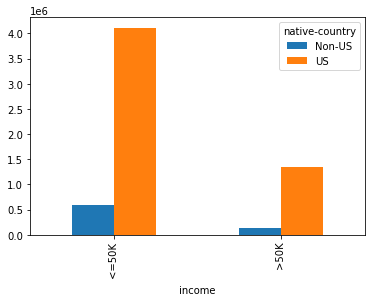

In [40]:
pd.crosstab(adult['income'],adult['native-country']).plot.bar()

In [41]:
# import libraries for building models
# libraries for models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# libraries for model evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# import visualization libraries
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
# ! pip install pydotplus
import pydotplus

# ! pip install scikit-learn
# ! pip install scikit-plot
import scikitplot as skplt

In [42]:
#Set feature vector and the target variable
X = adult.drop(['income', 'capital-gain', 'capital-loss', 'fnlwgt', 'education','native-country'], axis=1)
y = adult['income']

In [43]:
X.columns

Index(['age', 'workclass', 'education_num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week'],
      dtype='object')

In [44]:
# Set categorical variables
categorical = [e for e in X.columns if X[e].dtypes=='O']

In [45]:
print(categorical)

['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']


In [46]:
#Our numerical values
numerical = [x for x in X.columns if X[x].dtypes!='O']
print(numerical)

['age', 'education_num', 'hours-per-week']


In [47]:
# Encoding categorical variables using pandas' get_dummies()
X = pd.get_dummies(X, columns=categorical)
X.head()

,age,education_num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39.0,13,40.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,39.0,13,40.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,39.0,13,40.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,39.0,13,40.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,39.0,13,40.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [48]:
#Seperate data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    train_size = 0.7, random_state = 0)

In [49]:
X_train.shape, X_test.shape

((4325574, 47), (1853818, 47))

In [50]:
#Feature engineering part
X_train.dtypes

age                                      float64
education_num                              int64
hours-per-week                           float64
workclass_ Federal-gov                     uint8
workclass_ Local-gov                       uint8
workclass_ Never-worked                    uint8
workclass_ Private                         uint8
workclass_ Self-emp-inc                    uint8
workclass_ Self-emp-not-inc                uint8
workclass_ State-gov                       uint8
workclass_ Without-pay                     uint8
workclass_Unknown                          uint8
marital-status_ Divorced                   uint8
marital-status_ Married-AF-spouse          uint8
marital-status_ Married-civ-spouse         uint8
marital-status_ Married-spouse-absent      uint8
marital-status_ Never-married              uint8
marital-status_ Separated                  uint8
marital-status_ Widowed                    uint8
occupation_ Adm-clerical                   uint8
occupation_ Armed-Fo

In [51]:
X_train.isnull().sum()

age                                      0
education_num                            0
hours-per-week                           0
workclass_ Federal-gov                   0
workclass_ Local-gov                     0
workclass_ Never-worked                  0
workclass_ Private                       0
workclass_ Self-emp-inc                  0
workclass_ Self-emp-not-inc              0
workclass_ State-gov                     0
workclass_ Without-pay                   0
workclass_Unknown                        0
marital-status_ Divorced                 0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
occupation_ Adm-clerical                 0
occupation_ Armed-Forces                 0
occupation_ Craft-repair                 0
occupation_ Exec-managerial              0
occupation_

In [52]:
X_test.isnull().sum()

age                                      0
education_num                            0
hours-per-week                           0
workclass_ Federal-gov                   0
workclass_ Local-gov                     0
workclass_ Never-worked                  0
workclass_ Private                       0
workclass_ Self-emp-inc                  0
workclass_ Self-emp-not-inc              0
workclass_ State-gov                     0
workclass_ Without-pay                   0
workclass_Unknown                        0
marital-status_ Divorced                 0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
occupation_ Adm-clerical                 0
occupation_ Armed-Forces                 0
occupation_ Craft-repair                 0
occupation_ Exec-managerial              0
occupation_

In [53]:
#Feature scaling for Naive Bayes Model
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
scaled = scaler.fit_transform(X_test)
X_test_data = pd.DataFrame(scaled)
X_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.783333,0.533333,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.816667,0.800000,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.416667,0.533333,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.450000,0.533333,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.516667,0.800000,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
scaled2 = scaler.fit_transform(X_train)
X_train_data = pd.DataFrame(scaled2)
X_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.800000,0.800000,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.383333,0.533333,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.700000,0.533333,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.166667,0.800000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.233333,0.800000,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Naive Bayes Model

<font color="blue">**Q10: Naïve Bayes Model**

Q10.1 Build a model to predict income > $50K using naïve Bayes. Randomly partition the data into a training set (70%) and a validation set (30%).</font>

In [56]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_data, y_train)

GaussianNB()

In [57]:
#Predict the outcomes/results
y_pred_gnb = gnb.predict(X_test_data)

print(y_pred_gnb)

[' <=50K' ' >50K' ' >50K' ... ' >50K' ' >50K' ' <=50K']


<font color="blue">**Q10.2** Score the validation data (predict) using the model. Produce a confusion table and an ROC curve for the scored validation data.</font>

In [58]:
#Checking the TEST DATA ACCURACY of the model
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))

Model accuracy score: 0.6098


In [59]:
#Checking the TRAIN Data Accuracy
y_pred_train_gnb = gnb.predict(X_train_data)
print('Training data accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gnb)))

#Checking for over and underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train_data, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test_data, y_test)))

Training data accuracy score: 0.6100
Training set score: 0.6100
Test set score: 0.6098


In [60]:
y_test.value_counts()

 <=50K    1411772
 >50K      442046
Name: income, dtype: int64

In [61]:
#Comparing Model Accuracy to NULL Accuracy
null_model_accuracy = (1411772/(1411772+442046))

print('Null accuracy score: {0:0.4f}'. format(null_model_accuracy))

Null accuracy score: 0.7615


In [62]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_gnb = confusion_matrix(y_test, y_pred_gnb)

print('Confusion matrix\n\n', cm_gnb)

print('\nTrue Positives(TP) = ', cm_gnb[0,0])

print('\nTrue Negatives(TN) = ', cm_gnb[1,1])

print('\nFalse Positives(FP) = ', cm_gnb[0,1])

print('\nFalse Negatives(FN) = ', cm_gnb[1,0])

Confusion matrix

 [[718654 693118]
 [ 30188 411858]]

True Positives(TP) =  718654

True Negatives(TN) =  411858

False Positives(FP) =  693118

False Negatives(FN) =  30188


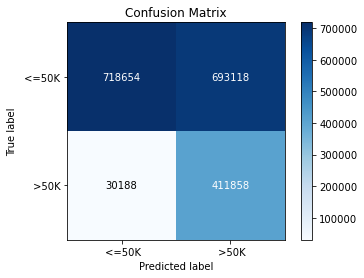

In [63]:
# Confusion Matrix Plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_gnb)
plt.show()

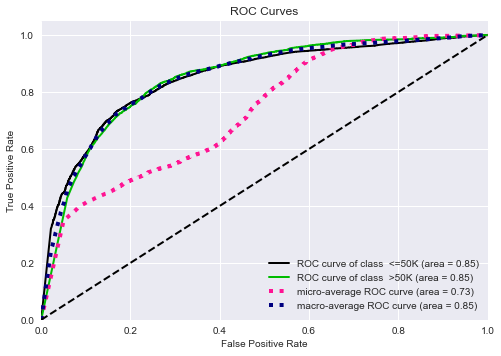

In [64]:
# print an ROC curve
plt.style.use('seaborn')
y_probs_gnb = gnb.predict_proba(X_test_data)
skplt.metrics.plot_roc(y_test, y_probs_gnb)
plt.show()

<font color="blue">**Q10.3** From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.</font>

In [65]:
#Metrics from confusion table
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

       <=50K       0.96      0.51      0.67   1411772
        >50K       0.37      0.93      0.53    442046

    accuracy                           0.61   1853818
   macro avg       0.67      0.72      0.60   1853818
weighted avg       0.82      0.61      0.63   1853818



In [66]:
TP = cm_gnb[0,0]
TN = cm_gnb[1,1]
FN = cm_gnb[1,0]
FP = cm_gnb[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

Classification accuracy : 0.6098
Classification error : 0.3902
Precision : 0.5090
True Positive Rate : 0.9597
False Positive Rate : 0.6273
Specificity : 0.3727
Prevalence : 0.7615


## Logit Model

<font color="blue">**Q11: Logit Model**</font>

<font color="blue">**Q11.1** Build a model to predict income > $50K using logistic regression. Randomly partition the data into a training set (70%) and a validation set (30%).
**Q11.2** For which variables can we reject the null hypothesis that their coefficients equal zero?</font>

In [67]:
#import all the packages for building the logit model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
lr=LogisticRegression(solver = 'lbfgs', max_iter= 1000000) 
lr.fit(X_train,y_train)
print(lr)

LogisticRegression(max_iter=1000000)


In [69]:
y_pred_lr=lr.predict(X_test)
print(y_pred_lr)

[' <=50K' ' >50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


<font color="blue">**Q11.3** Score the validation data (predict) using the model. Produce a confusion table and an ROC curve for the scored validation data.</font>

In [70]:
# produce confusion matrix
cm_lr = confusion_matrix(y_test,y_pred_lr)
print('Confusion matrix\n\n', cm_lr)

Confusion matrix

 [[1301817  109955]
 [ 187812  254234]]


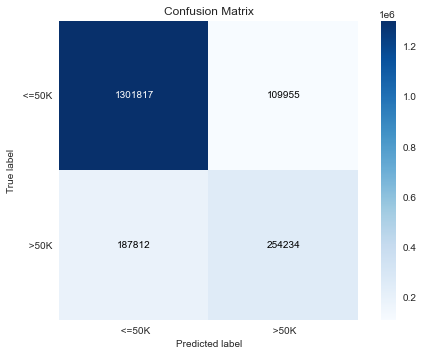

In [71]:
# Confusion Matrix Plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr)
plt.show()

In [72]:
#Metrics from confusion table
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90   1411772
        >50K       0.70      0.58      0.63    442046

    accuracy                           0.84   1853818
   macro avg       0.79      0.75      0.76   1853818
weighted avg       0.83      0.84      0.83   1853818



In [73]:
#Calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8393763573338915


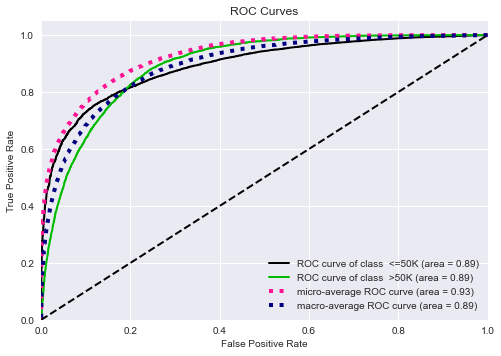

In [74]:
# print an ROC curve
plt.style.use('seaborn')
y_probs_lr = lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_lr)
plt.show()

In [75]:
print(lr.coef_, lr.intercept_)

[[ 0.03142512  0.29153194  0.07169593  0.3099993  -0.28996767 -0.48798262
  -0.18222092  0.12950467 -0.59173511 -0.51136272 -2.97329376 -0.21111183
  -1.38278892  1.43659175  1.2397032  -1.53660146 -1.75748709 -1.44957042
  -1.3580177  -0.02188795 -0.7560312   0.10176407  0.73390191 -1.15245632
  -0.73590284 -0.34026082 -0.89340243 -2.98520168  0.59458574  0.53079451
   0.24774538  0.71639472 -0.1491193  -0.69909445 -1.25761923 -0.21683415
  -1.5109403  -1.53220884 -0.39609913  0.105531   -1.23084202 -0.85949019
  -0.80416043 -1.20660526 -0.70707275 -2.7983088  -2.00986185]] [-4.87545365]


In [76]:
#Find the coef of all the variables
pd.DataFrame(zip(X_train.columns, 
                 np.transpose(lr.coef_.tolist()[0])), 
             columns=['','coef'])

,,coef
0,age,0.031425
1,education_num,0.291532
2,hours-per-week,0.071696
3,workclass_ Federal-gov,0.309999
4,workclass_ Local-gov,-0.289968
5,workclass_ Never-worked,-0.487983
6,workclass_ Private,-0.182221
7,workclass_ Self-emp-inc,0.129505
8,workclass_ Self-emp-not-inc,-0.591735
9,workclass_ State-gov,-0.511363


<font color="blue">**Q11.4** From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.</font>

In [77]:
TP = cm_lr[0,0]
TN = cm_lr[1,1]
FN = cm_lr[1,0]
FP = cm_lr[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

Classification accuracy : 0.8394
Classification error : 0.1606
Precision : 0.9221
True Positive Rate : 0.8739
False Positive Rate : 0.3019
Specificity : 0.6981
Prevalence : 0.7615


## Decision Tree Model

<font color="blue">**Q12. Tree Model (CART)**</font>

<font color="blue">Q12.1 Build a model to predict income > $50K using a classification tree and a random forest with the same training and validation data used for the naïve Bayes and logistic regression models.</font>

In [78]:
# Build the tree model
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(class_weight=None, 
                             max_depth=5, 
                             min_samples_leaf=1000, 
                             max_features=None,
                             random_state=0)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test, y_pred_dtc)

0.8245955104546401

<font color="blue">Q12.2 Which variables are useful for decision rules?</font>

According to the decision tree graph below, indicating variables are: 
<p> - Marital-status</p>
<p> - Education_num</p>
<p> - Age</p>
<p> - Hours-per-week</p>
<p> - Occupation</p>

<font color="blue">
    <p>Q12.3 Show a plot of the tree.</p></font>

In [79]:
# print tree summary and model evaluation metrics
print('***************** Tree Summary ********************')
print('Classes: ', dtc.classes_)
print('Tree Depth: ', dtc.tree_.max_depth)
print('No. of leaves: ', dtc.tree_.n_leaves)
print('No. of features: ', dtc.n_features_)

***************** Tree Summary ********************
Classes:  [' <=50K' ' >50K']
Tree Depth:  5
No. of leaves:  32
No. of features:  47


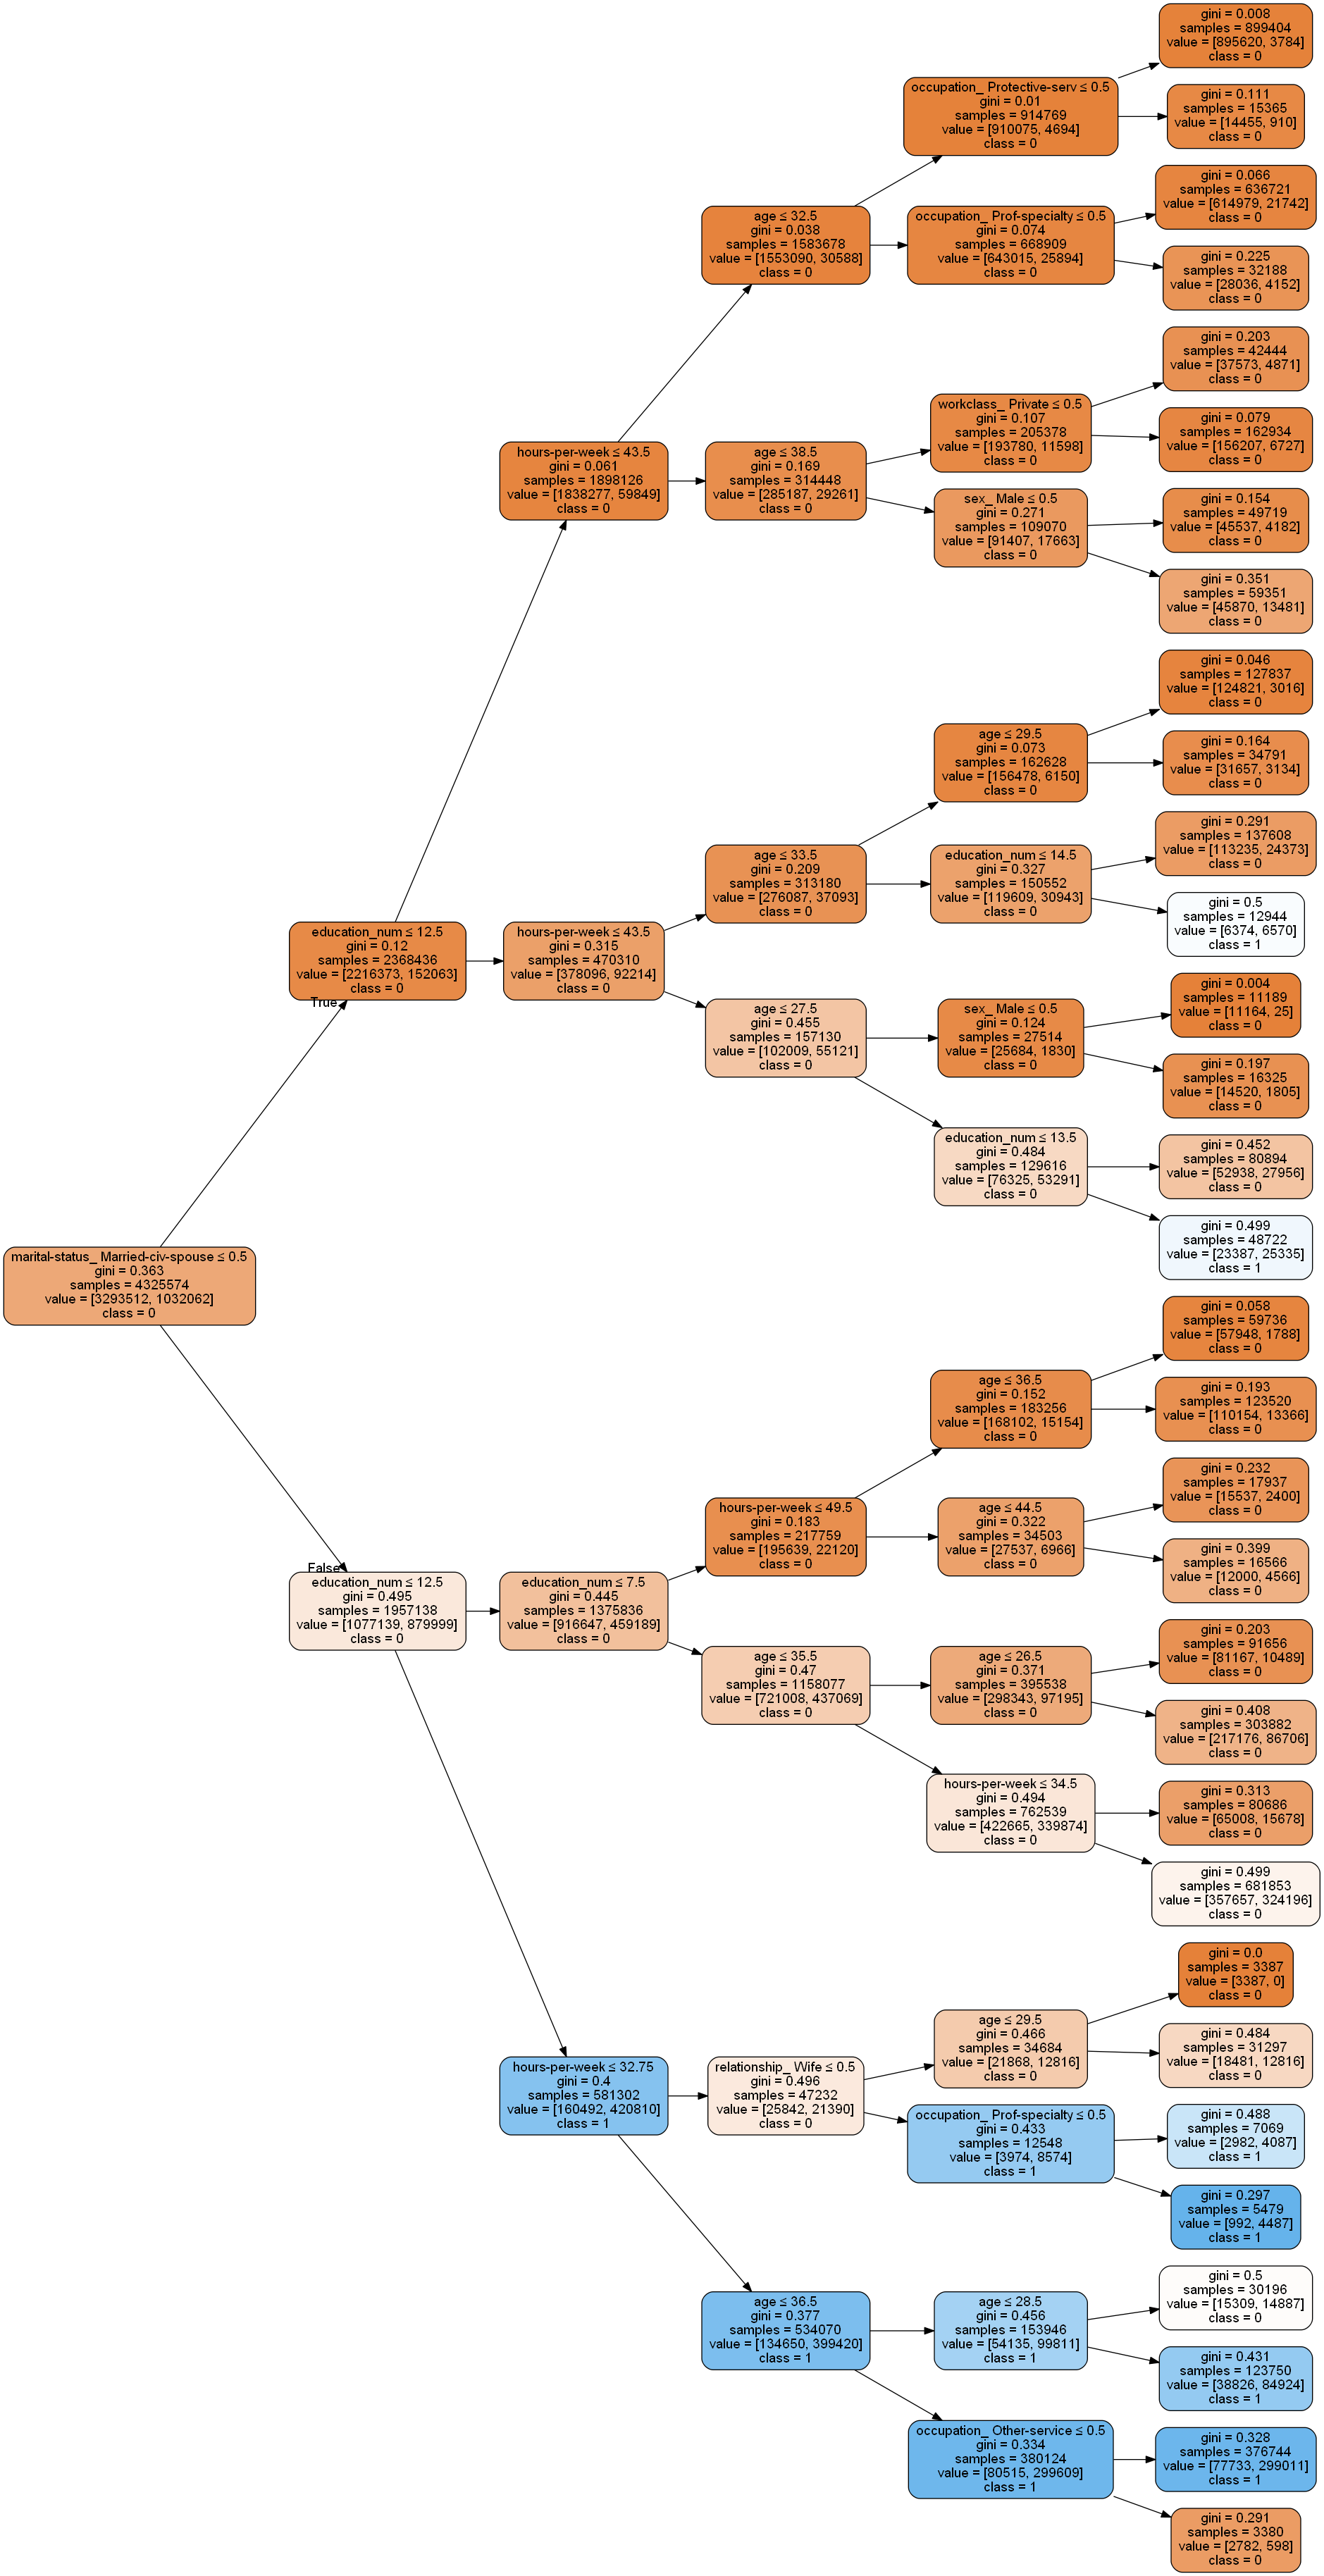

In [80]:
# Visualize the tree
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                rotate=True,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_final_5.png')
Image(graph.create_png())

<font color="blue">Q12.4 Score the validation data (predict) using the model. Produce a confusion table and an ROC curve for the scored validation data.</font>

In [81]:
# produce a confusion table
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print('Confusion Matrix: \n', cm_dtc)

Confusion Matrix: 
 [[1347133   64639]
 [ 260529  181517]]


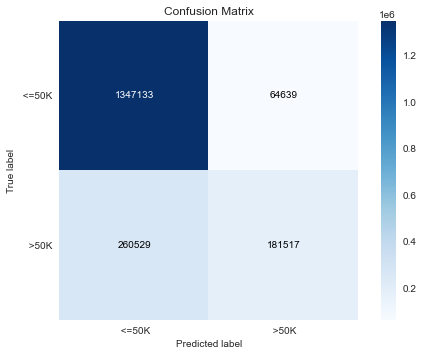

In [82]:
# produce a confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc)
plt.show()

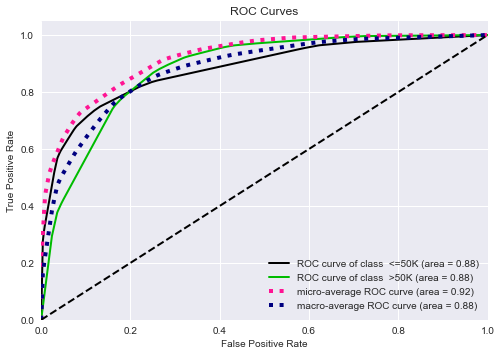

In [83]:
# print an ROC curve
plt.style.use('seaborn')
y_probs_dtc = dtc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_dtc)
plt.show()

<font color="blue">Q12.5 From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.</font>

In [84]:
TP = cm_dtc[0,0]
TN = cm_dtc[1,1]
FN = cm_dtc[1,0]
FP = cm_dtc[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

Classification accuracy : 0.8246
Classification error : 0.1754
Precision : 0.9542
True Positive Rate : 0.8379
False Positive Rate : 0.2626
Specificity : 0.7374
Prevalence : 0.7615


In [85]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89   1411772
        >50K       0.74      0.41      0.53    442046

    accuracy                           0.82   1853818
   macro avg       0.79      0.68      0.71   1853818
weighted avg       0.81      0.82      0.81   1853818



## Random Forest Model

In [92]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = RandomForestClassifier(n_estimators=40, 
                            #max_depth=5,
                            min_samples_split=500,
                            oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=500, n_estimators=40, oob_score=True)

In [93]:
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

#print(classification_report(y_test, y_pred_rf))
#Estimation
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}') # use remaining data for testing: 30%
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.949
Mean accuracy score: 0.951


In [94]:
# produce a confusion table
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix: \n', cm_rf)

Confusion Matrix: 
 [[1374734   37038]
 [  54407  387639]]


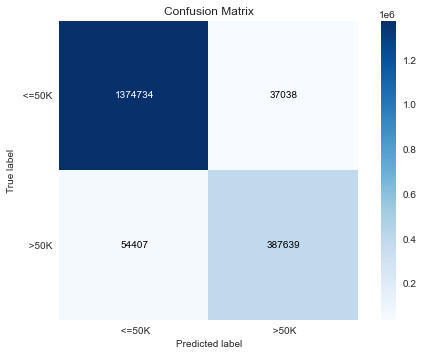

In [95]:
# produce a confusion matrix plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf)
plt.show()

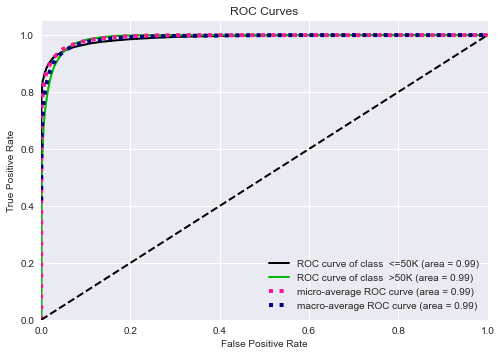

In [96]:
# print an ROC curve
plt.style.use('seaborn')
y_probs_rf = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_rf)
plt.show()

In [97]:
# Use confusion matrix to calculate related metrics
TP = cm_rf[0,0]
TN = cm_rf[1,1]
FN = cm_rf[1,0]
FP = cm_rf[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

Classification accuracy : 0.9507
Classification error : 0.0493
Precision : 0.9738
True Positive Rate : 0.9619
False Positive Rate : 0.0872
Specificity : 0.9128
Prevalence : 0.7615


In [98]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.96      0.97      0.97   1411772
        >50K       0.91      0.88      0.89    442046

    accuracy                           0.95   1853818
   macro avg       0.94      0.93      0.93   1853818
weighted avg       0.95      0.95      0.95   1853818



In [99]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.012 seconds


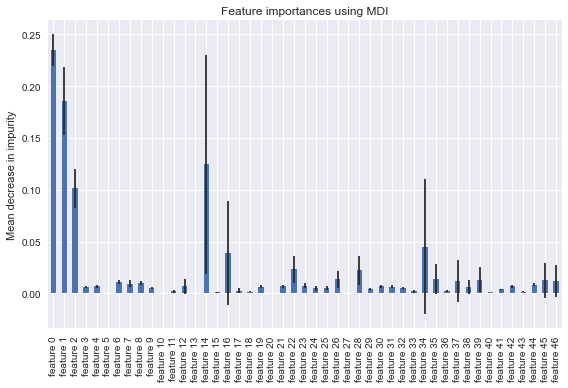

In [100]:
# plot the impurity-based importance.

import pandas as pd
feature_names = [f"feature {i}" for i in range(X.shape[1])]

rf_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [101]:
rf_importances.head()

feature 0    0.234692
feature 1    0.185710
feature 2    0.101455
feature 3    0.005821
feature 4    0.006720
dtype: float64

In [102]:
# rf_importances.dtype
# rf_importances.max()
import heapq
import numpy as np
rf_importnaces_L = list(round(rf_importances,4))
# print(rf_importnaces_L)
columns_list = list(X.columns)
dictionary = dict(zip(columns_list,rf_importnaces_L))
print(dictionary)

{'age': 0.2347, 'education_num': 0.1857, 'hours-per-week': 0.1015, 'workclass_ Federal-gov': 0.0058, 'workclass_ Local-gov': 0.0067, 'workclass_ Never-worked': 0.0, 'workclass_ Private': 0.0106, 'workclass_ Self-emp-inc': 0.0093, 'workclass_ Self-emp-not-inc': 0.0097, 'workclass_ State-gov': 0.0054, 'workclass_ Without-pay': 0.0001, 'workclass_Unknown': 0.002, 'marital-status_ Divorced': 0.0066, 'marital-status_ Married-AF-spouse': 0.0004, 'marital-status_ Married-civ-spouse': 0.1247, 'marital-status_ Married-spouse-absent': 0.001, 'marital-status_ Never-married': 0.0392, 'marital-status_ Separated': 0.0025, 'marital-status_ Widowed': 0.0017, 'occupation_ Adm-clerical': 0.0065, 'occupation_ Armed-Forces': 0.0, 'occupation_ Craft-repair': 0.0069, 'occupation_ Exec-managerial': 0.0232, 'occupation_ Farming-fishing': 0.0075, 'occupation_ Handlers-cleaners': 0.0049, 'occupation_ Machine-op-inspct': 0.0054, 'occupation_ Other-service': 0.0134, 'occupation_ Priv-house-serv': 0.0002, 'occupat

In [103]:
# find the fisrt 5 Mean decrease in impurity, the larger the more important for the model
def top_n_scores(n, score_dict):
  ''' returns the n scores from a name:score dict'''
  lot = [(k,v) for k, v in dictionary.items()] #make list of tuple from scores dict
  nl = []
  while len(lot)> 0:
      nl.append(max(lot, key=lambda x: x[1]))
      lot.remove(nl[-1])
  return nl[0:n]   
top_n_scores(5, dictionary)  


[('age', 0.2347),
 ('education_num', 0.1857),
 ('marital-status_ Married-civ-spouse', 0.1247),
 ('hours-per-week', 0.1015),
 ('relationship_ Husband', 0.0448)]

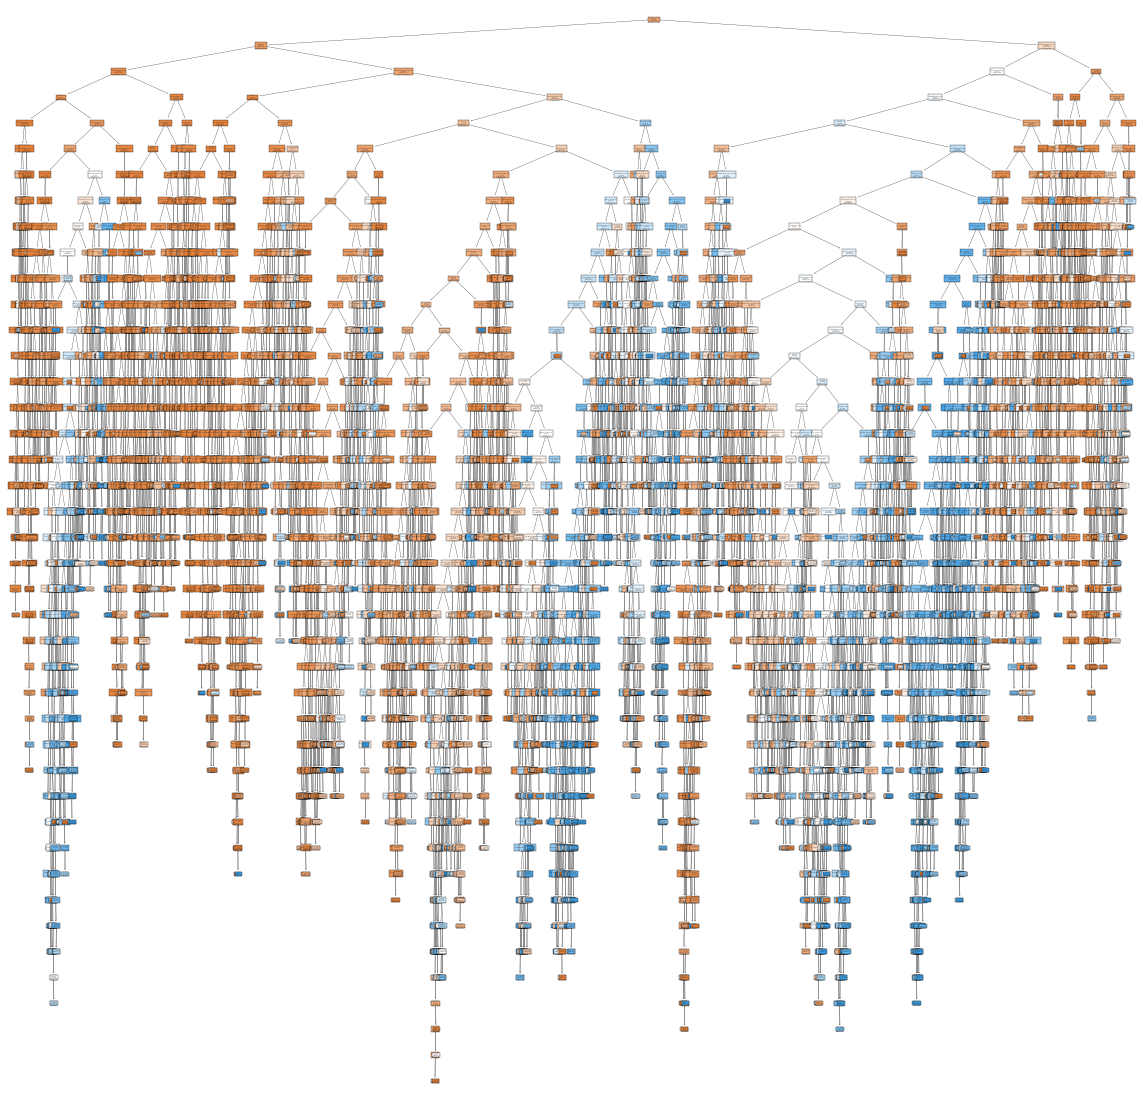

In [104]:
# visualize individual trees - examine the first tree
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], 
                   feature_names=X.columns, filled=True)